In [21]:
import tensorflow as tf

import matplotlib.pyplot as mtb
import numpy as np
import pandas as pd
%matplotlib inline

In [22]:
import glob
import cv2
import os

In [23]:
import tensorflow as tf


In [24]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10510446046222162929
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3141979340
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12158492018647675052
physical_device_desc: "device: 0, name: GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [25]:
filelist = glob.glob(r'C:/Users/Divyansh/Desktop/ez/gala/Train Images/*.jpg')

In [26]:
imagelist=list()

for x in filelist:
    img=cv2.imread(x,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(80,80))
    imagelist.append(img)
  
    
images=np.array(imagelist)

In [27]:
images.shape

(5983, 80, 80, 3)

In [29]:
traininglabels=pd.read_csv('train.csv')

In [30]:
traininglabels['Image']='C:/Users/Divyansh/Desktop/ez/gala/Train Images\\'+  traininglabels['Image']

In [31]:
filelist=pd.DataFrame(filelist,columns=['Image'])

In [32]:
labels=filelist.merge(traininglabels,on=['Image'])

In [33]:
labels.head()

,Image,Class
0,C:/Users/Divyansh/Desktop/ez/gala/Train Images...,Food
1,C:/Users/Divyansh/Desktop/ez/gala/Train Images...,misc
2,C:/Users/Divyansh/Desktop/ez/gala/Train Images...,misc
3,C:/Users/Divyansh/Desktop/ez/gala/Train Images...,Decorationandsignage
4,C:/Users/Divyansh/Desktop/ez/gala/Train Images...,Food


In [34]:
labels.isnull().sum()

Image    0
Class    0
dtype: int64

In [35]:
len(images)

5983

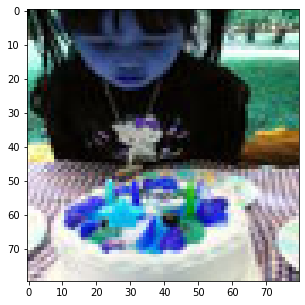

In [36]:
mtb.figure(figsize=(5,5))
mtb.imshow(images[999])

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()


In [39]:
imagelabels=np.array(le.fit_transform(labels['Class']))

In [40]:
le.inverse_transform([0,1,2,3])

array(['Attire', 'Decorationandsignage', 'Food', 'misc'], dtype=object)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2,1.0],
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=0.3,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
    rescale=None,
    data_format=None,
    validation_split=0,
    dtype=None)

test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.1,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
    rescale=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)

train_generator = train_datagen.flow(images,imagelabels,batch_size=64)

validation_generator = test_datagen.flow(images,imagelabels,batch_size=64)

In [41]:
from tensorflow import keras

In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input
import tensorflow

In [ ]:
model=Sequential()

In [ ]:
model.add(ResNet50(include_top=False,weights='imagenet',input_shape=(80,80,3),pooling='avg'))

In [ ]:
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(4,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt,loss=keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
opt2=tf.keras.optimizers.Adam(lr=0.0001)

In [ ]:
model.fit(presentimages,presentlabels,batch_size=64,validation_split=0.1)

In [52]:
model.fit_generator(verbose=1,generator=train_generator,epochs=1,workers=1,steps_per_epoch=100,validation_data=validation_generator,validation_steps=16)

100/100 [==============================] - 56s 560ms/step - loss: 0.2368 - accuracy: 0.9182 - val_loss: 0.0672 - val_accuracy: 0.9814


In [63]:
model.fit_generator(verbose=1,generator=train_generator,epochs=1,workers=2,steps_per_epoch=100,validation_data=validation_generator,validation_steps=16)

100/100 [==============================] - 66s 659ms/step - loss: 0.1255 - accuracy: 0.9587 - val_loss: 0.0621 - val_accuracy: 0.9775


In [64]:
model.save('model_resnet50all.h5')

In [ ]:
final_test = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input,featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.1,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=True,
    rescale=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)


In [ ]:
final_test_g=final_test.flow(images,imagelabels,batch_size=32,save_format='jpg',)

In [ ]:
model.evaluate_generator(final_test_g)